## Predição de câncer de mama usando IA.


### Preparando ambiente

In [65]:
## Conexão com google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
## Importando bibliotecas
import pandas as pd
import plotly.express as px
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

### Carregando banco de dados

In [67]:
CAMINHO_DADOS = '/content/drive/MyDrive/Datasets/data_mama.csv'
dados = pd.read_csv(CAMINHO_DADOS)
display(dados)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### Verificando dados

In [68]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [69]:
dados.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [70]:
# Histograma de Diagnosticos
# O diagnóstico dos tecidos mamários (M = malignant, B = benign)
px.histogram(dados, x = 'diagnosis', text_auto=True)

In [71]:
px.box(dados, x = 'radius_mean', color = 'diagnosis')

## Transformação de dados

In [73]:
x = dados.drop(['id','diagnosis', 'Unnamed: 32'], axis = 1)
y = dados['diagnosis']

In [74]:
colunas = x.columns

In [75]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

## Separando base de dados

In [76]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify = y,  random_state = 5)

## Algortimo dummy classifier

In [77]:
dummy = DummyClassifier()
dummy.fit(x_treino, y_treino)

DummyClassifier()

In [63]:
dummy.score(x_teste, y_teste)

0.6293706293706294

## Algoritmo Árvore de decisão

In [78]:
arvore = DecisionTreeClassifier(random_state =5)
arvore.fit(x_treino, y_treino)

arvore.predict(x_teste)
arvore.score(x_teste, y_teste)

0.8671328671328671

In [79]:
plt.figure(figsize = (30, 10))

<Figure size 3000x1000 with 0 Axes>

<Figure size 3000x1000 with 0 Axes>

[Text(0.6125, 0.9375, 'x[22] <= 105.95\ngini = 0.468\nsamples = 426\nvalue = [267, 159]\nclass = nao'),
 Text(0.375, 0.8125, 'x[27] <= 0.159\ngini = 0.086\nsamples = 265\nvalue = [253, 12]\nclass = nao'),
 Text(0.49375, 0.875, 'True  '),
 Text(0.275, 0.6875, 'x[18] <= 0.009\ngini = 0.038\nsamples = 256\nvalue = [251, 5]\nclass = nao'),
 Text(0.225, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = sim'),
 Text(0.325, 0.5625, 'x[20] <= 15.78\ngini = 0.031\nsamples = 255\nvalue = [251, 4]\nclass = nao'),
 Text(0.2, 0.4375, 'x[24] <= 0.191\ngini = 0.016\nsamples = 248\nvalue = [246, 2]\nclass = nao'),
 Text(0.1, 0.3125, 'x[21] <= 33.35\ngini = 0.008\nsamples = 246\nvalue = [245, 1]\nclass = nao'),
 Text(0.05, 0.1875, 'gini = 0.0\nsamples = 230\nvalue = [230, 0]\nclass = nao'),
 Text(0.15, 0.1875, 'x[21] <= 33.8\ngini = 0.117\nsamples = 16\nvalue = [15, 1]\nclass = nao'),
 Text(0.1, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = sim'),
 Text(0.2, 0.0625, 'gini = 0.0\nsam

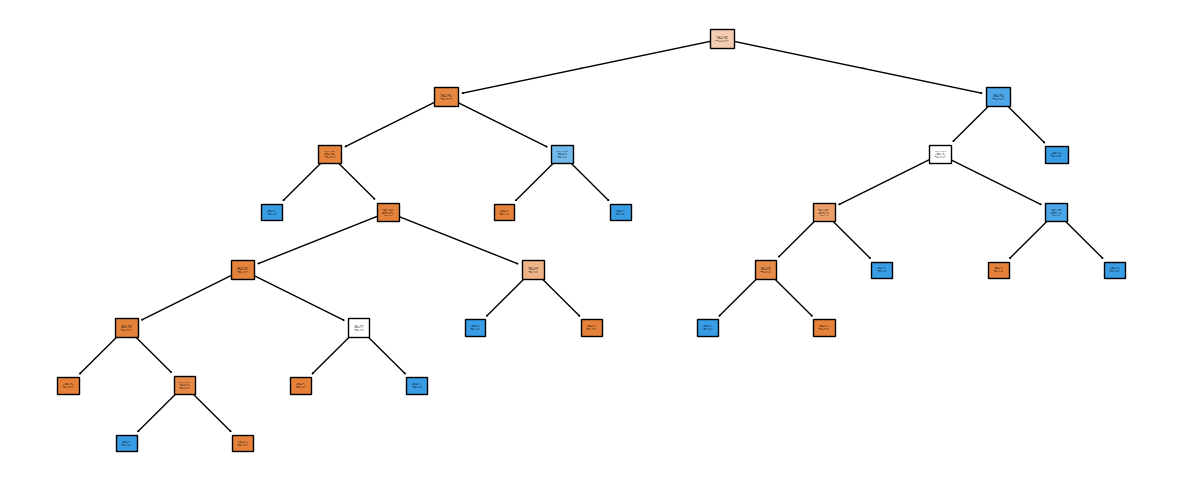

In [80]:
plt.figure(figsize = (15, 6))
plot_tree(arvore, filled = True, class_names = ['nao', 'sim'], fontsize = 1)

In [81]:
arvore.score(x_treino, y_treino)

1.0

In [82]:
#Profundidade maxima 3
arvore = DecisionTreeClassifier(max_depth=3, random_state =5)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [83]:
arvore.score(x_treino, y_treino)

0.9812206572769953

In [84]:
arvore.score(x_teste, y_teste)

0.8881118881118881

[Text(0.5769230769230769, 0.875, 'x[22] <= 105.95\ngini = 0.468\nsamples = 426\nvalue = [267, 159]\nclass = nao'),
 Text(0.3076923076923077, 0.625, 'x[27] <= 0.159\ngini = 0.086\nsamples = 265\nvalue = [253, 12]\nclass = nao'),
 Text(0.4423076923076923, 0.75, 'True  '),
 Text(0.15384615384615385, 0.375, 'x[18] <= 0.009\ngini = 0.038\nsamples = 256\nvalue = [251, 5]\nclass = nao'),
 Text(0.07692307692307693, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = sim'),
 Text(0.23076923076923078, 0.125, 'gini = 0.031\nsamples = 255\nvalue = [251, 4]\nclass = nao'),
 Text(0.46153846153846156, 0.375, 'x[21] <= 23.47\ngini = 0.346\nsamples = 9\nvalue = [2, 7]\nclass = sim'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = nao'),
 Text(0.5384615384615384, 0.125, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]\nclass = sim'),
 Text(0.8461538461538461, 0.625, 'x[27] <= 0.141\ngini = 0.159\nsamples = 161\nvalue = [14, 147]\nclass = sim'),
 Text(0.7115384615384615,

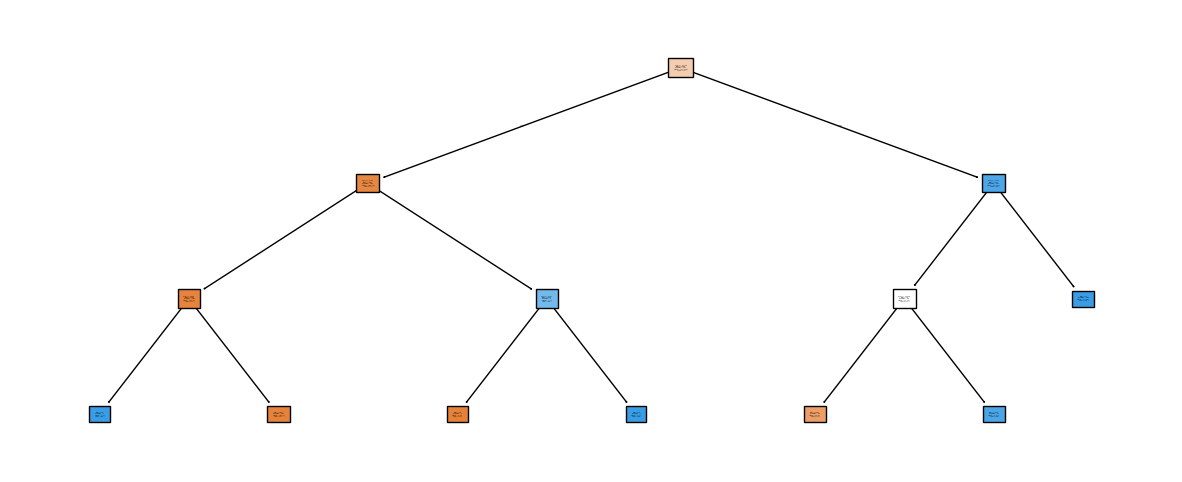

In [51]:
plt.figure(figsize = (15, 6))
plot_tree(arvore, filled = True, class_names = ['nao', 'sim'], fontsize = 1)

## Algoritmo KNN

### Normalização de dados

In [85]:
normalizacao = MinMaxScaler()
x_treino_normalizado = normalizacao.fit_transform(x_treino)
x_teste_normalizado = normalizacao.fit_transform(x_teste)

In [86]:
pd.DataFrame(x_treino_normalizado)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.966208,0.694340,0.988619,1.000000,0.503476,0.540295,0.851687,0.839463,0.477309,0.126907,...,1.000000,0.515725,1.000000,1.000000,0.372608,0.427361,0.545767,0.904237,0.212103,0.163021
1,0.629757,0.467505,0.639351,0.488115,0.469170,0.462214,0.488519,0.657058,0.512547,0.259958,...,0.570938,0.358742,0.537390,0.393360,0.308353,0.302058,0.354073,0.739924,0.298048,0.175059
2,0.247759,0.293082,0.246052,0.138763,0.540489,0.267168,0.090909,0.148857,0.508809,0.338771,...,0.210949,0.259062,0.198973,0.099370,0.457801,0.172842,0.113658,0.277127,0.296866,0.258817
3,0.218865,0.348847,0.216034,0.122243,0.345220,0.162684,0.068322,0.075895,0.158569,0.266949,...,0.170382,0.422441,0.174572,0.080339,0.265035,0.206376,0.129393,0.196004,0.165780,0.188623
4,0.321710,0.354717,0.308010,0.198533,0.118534,0.080590,0.057990,0.068290,0.249867,0.119068,...,0.275638,0.352878,0.260841,0.147901,0.074796,0.193857,0.125000,0.259387,0.211118,0.184130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.254126,0.805451,0.245981,0.147559,0.258193,0.099530,0.145150,0.116451,0.213027,0.144915,...,0.190483,0.632196,0.174623,0.092323,0.278752,0.132714,0.194808,0.223665,0.159077,0.147338
422,0.239434,0.364361,0.226988,0.136703,0.282567,0.049106,0.004358,0.014533,0.282968,0.176059,...,0.176230,0.294776,0.157948,0.084483,0.142300,0.025675,0.004456,0.030217,0.185295,0.078586
423,0.268329,0.356813,0.258643,0.157427,0.198881,0.104860,0.113847,0.142644,0.153230,0.111229,...,0.227396,0.316365,0.206446,0.115125,0.318461,0.171278,0.149840,0.359972,0.132072,0.120465
424,0.333464,0.049476,0.329777,0.201794,0.518823,0.261524,0.207170,0.287177,0.367859,0.291949,...,0.256633,0.105544,0.245590,0.129491,0.340842,0.151493,0.204473,0.420599,0.260990,0.212106


In [87]:
pd.DataFrame(x_teste_normalizado)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.283695,0.290616,0.261406,0.171926,0.294193,0.077529,0.018189,0.044616,0.296044,0.274754,...,0.215079,0.479103,0.190732,0.117784,0.439421,0.061346,0.032751,0.136873,0.234791,0.097915
1,0.243160,0.000000,0.229584,0.142298,0.334713,0.138038,0.032059,0.046560,0.477750,0.319629,...,0.175000,0.000000,0.172285,0.092692,0.327478,0.131278,0.075330,0.162027,0.433460,0.113035
2,0.350899,0.111345,0.343532,0.223841,0.607647,0.341826,0.184334,0.232671,0.557478,0.378402,...,0.279762,0.130916,0.283358,0.164458,0.572031,0.235284,0.233213,0.312371,0.356226,0.162526
3,0.787722,0.359594,0.793727,0.721939,0.449422,0.605164,0.514775,0.568740,0.408529,0.346844,...,0.803968,0.470498,0.813293,0.721202,0.482477,0.431945,0.525520,0.632646,0.301093,0.207886
4,0.396768,0.203782,0.386167,0.266649,0.499358,0.323676,0.187781,0.220753,0.526576,0.409959,...,0.346825,0.265519,0.340936,0.222022,0.501421,0.300579,0.339819,0.485911,0.353375,0.201625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.515708,0.373249,0.507706,0.407769,0.707519,0.432573,0.357645,0.479352,0.577874,0.386219,...,0.735317,0.574370,0.707642,0.665770,0.941445,0.320662,0.424887,0.719931,0.486454,0.254912
139,0.487973,0.250700,0.484702,0.355585,0.591953,0.467502,0.317542,0.405227,0.579728,0.439780,...,0.487302,0.442225,0.460003,0.352860,0.632309,0.536630,0.477285,0.640550,0.642586,0.439153
140,0.679983,0.318627,0.666437,0.569247,0.623341,0.566810,0.566839,0.509148,0.415946,0.492472,...,0.688492,0.390904,0.611493,0.573275,0.859640,0.551280,0.768235,0.861512,0.281131,0.481782
141,0.622380,0.240896,0.612760,0.499598,0.676131,0.510992,0.462946,0.527444,0.523486,0.304864,...,0.590873,0.259680,0.560065,0.453227,0.832946,0.467357,0.664706,0.817182,0.530656,0.229668


### Aplicando algoritmo

In [89]:
knn = KNeighborsClassifier()

In [90]:
knn.fit(x_treino_normalizado, y_treino)

KNeighborsClassifier()

In [91]:
knn.score(x_teste_normalizado, y_teste)

0.951048951048951

##Comparando resultados

In [92]:
print(f'Acurácia Dammy: {dummy.score(x_teste, y_teste)}')
print(f'Acurácia Árvore: {arvore.score(x_teste, y_teste)}')
print(f'Acurácia KNN: {knn.score(x_teste_normalizado, y_teste)}')

Acurácia Dammy: 0.6293706293706294
Acurácia Árvore: 0.8881118881118881
Acurácia KNN: 0.951048951048951


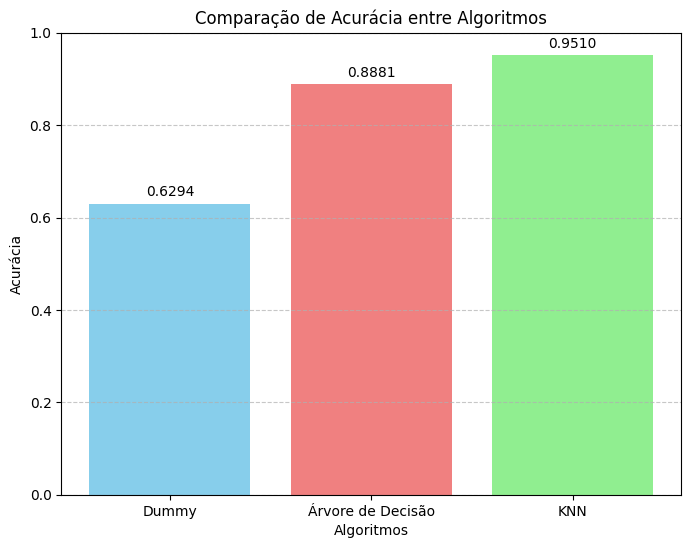

In [95]:
# Dados de acurácia
acuracias = {
    'Dummy': dummy.score(x_teste, y_teste),
    'Árvore de Decisão': arvore.score(x_teste, y_teste),
    'KNN': knn.score(x_teste_normalizado, y_teste)
}

algoritmos = list(acuracias.keys())
valores_acuracia = list(acuracias.values())

plt.figure(figsize=(8, 6))
plt.bar(algoritmos, valores_acuracia, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Algoritmos')
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia entre Algoritmos')
plt.ylim(0, 1)  # Define o limite do eixo y de 0 a 1 para melhor visualização
plt.grid(axis='y', linestyle='--', alpha=0.7)


for i, v in enumerate(valores_acuracia):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')


plt.show()


## Informações Gerais

link para o dataset: https://www.kaggle.com/code/anandhuh/breast-cancer-prediction-accuracy-98-24/notebook

